In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm, vhmm
import joblib
import seaborn as sns
import networkx as nx
import pprint as pprint

# Import data

Chargement des corrdonnées du museau 

In [10]:
X = pd.pandas.read_csv("E:/UQAM/Recherche/Code/data/Thunder_boxes_cow_head_snout.csv",  names=None)
# ['cow L', 'cow T', 'cow W', 'cow H', 'Head L', 'Head T', 'Head W', 'Head H', 'snout L', 'snout R', 'snout W', 'snout H']
pprint.pp(X)

# X = np.concatenate([X_head, X_snout, X_cow], axis=1)
df = pd.DataFrame(X)

X.shape

       frame      cow L      cow T     cow W     cow H     head L     head T  \
0          1  1053.5316  1011.5867  755.2519  542.6919  1046.0167  1015.8938   
1          2  1053.4913  1011.5949  755.2898  542.6784  1045.9811  1015.8992   
2          3  1053.4499  1011.6033  755.3288  542.6644  1045.9445  1015.9048   
3          4  1053.4164  1011.6100  755.3604  542.6531  1045.9150  1015.9094   
4          5  1053.3882  1011.6157  755.3869  542.6436  1045.8901  1015.9132   
...      ...        ...        ...       ...       ...        ...        ...   
23088  23089  1138.2633   638.8083  663.0053  834.9275  1415.1894   638.8083   
23089  23090  1136.8789   640.3952  664.3897  834.3985  1412.8822   640.3952   
23090  23091  1135.2947   642.2111  665.9739  833.7932  1410.2418   642.2111   
23091  23092  1131.0894   647.0315  670.1791  832.1864  1403.2330   647.0315   
23092  23093  1128.6810   649.7921  672.5875  831.2662  1399.2190   649.7921   

         head W    head H    snout L   

(23093, 13)

# Train model

In [3]:
em_scores = list()
vi_scores = list()
em_models = list()
vi_models = list()

for n_components in range(2, 5):
    for idx in range(10):
        
        em_model = hmm.GaussianHMM(n_components=n_components, random_state=idx,covariance_type = "full", n_iter=52)
        # variational inference
        vi_model = vhmm.VariationalGaussianHMM(n_components=n_components, random_state=idx, covariance_type='full', n_iter=52)
        em_model.fit(df)
        vi_model.fit(df)
        em_models.append(em_model)
        vi_models.append(vi_model)
        em_scores.append(em_model.score(df))
        vi_scores.append(vi_model.score(df))
        # ll = em_model.monitor_.history[-1]
        """ print(f"Training EM({n_components}) Final Log Likelihood={ll} "
              f"Iterations={len(vi_model.monitor_.history)} ") """
        # print(f'Converged: {em_model.monitor_.converged}\t\t'f'Score: {scores[-1]}')

em_model = em_models[np.argmax(em_scores)]
vi_model = vi_models[np.argmax(vi_scores)]
# print(f'The best model had a score of {max(scores)} and 'f'{em_model.n_components} components')


em_Z = em_model.predict(X)
vi_Z = vi_model.predict(X)


Model is not converging.  Current: -1313079.921212742 is not greater than -1313079.9212126788. Delta is -6.332993507385254e-08
Model is not converging.  Current: -1313079.9212120266 is not greater than -1313079.9212118667. Delta is -1.5995465219020844e-07
Model is not converging.  Current: -1242505.4622786855 is not greater than -1242505.4622783533. Delta is -3.3224932849407196e-07
Model is not converging.  Current: -1212222.009060777 is not greater than -1212222.0090604883. Delta is -2.8870999813079834e-07
Model is not converging.  Current: -1173296.0892114935 is not greater than -1173296.0892112583. Delta is -2.3515895009040833e-07


In [4]:

joblib.dump(em_model, 'models/EM/hmm_thunder_model.pkl')
joblib.dump(vi_model, 'models/Vi/hmm_thunder_model.pkl')

# print(em_model.means_)
# print(len(em_Z)/30)
# print(vi_model.means_)
#print(model.covars_)

[[13341.08115837  1013.59268394   614.41940125   804.68393049
    901.13221415  1018.31097595   728.81827054   459.25335979
    404.9872664   1081.42927766  1027.37552624    99.41562542
     94.24560806]
 [ 2457.1635285    997.29602256  1007.97370057   813.57065961
    546.09540675  1004.72807024  1004.7440069    556.44461714
    485.15614103  1208.40945246  1390.24439331   139.23687516
     93.37868131]
 [20346.78934508  1352.64730124   630.46420167   585.30143362
    853.97052102  1577.69846872   628.76140195   356.21832089
    287.46988551  1824.27447672   809.37482222    79.49948954
     93.32406684]
 [ 8569.21143307  1199.02958144   497.31537305   778.37323391
   1028.00556147  1441.44877884   559.62797536   498.3268103
    428.52046206  1707.74970763   867.63236499   101.17422225
    110.11545127]]
769.7666666666667
[[13340.57607699  1013.43561786   614.40726983   804.829291
    901.15362684  1018.16455225   728.85371073   459.2877358
    405.03109892  1081.21556615  1027.4571882

In [5]:
df = pd.DataFrame(em_Z)
df.to_csv("../INF889E Project/Trained data/EM/thunder_states.csv")

df = pd.DataFrame(vi_Z)
df.to_csv("../INF889E Project/Trained data/VI/thunder_states.csv")


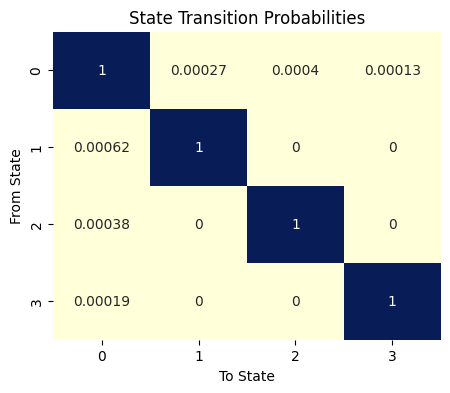

In [6]:
transition_matrix = em_model.transmat_
plt.figure(figsize=(5, 4))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title('State Transition Probabilities')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

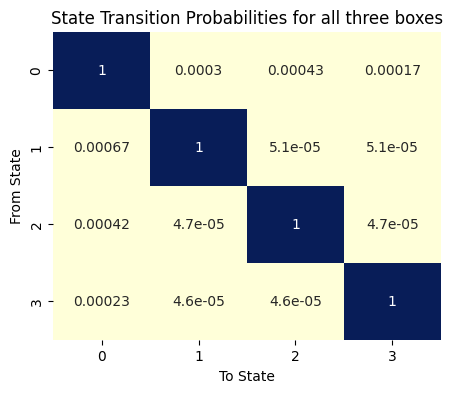

In [7]:
transition_matrix = vi_model.transmat_
plt.figure(figsize=(5, 4))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title('State Transition Probabilities for all three boxes')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

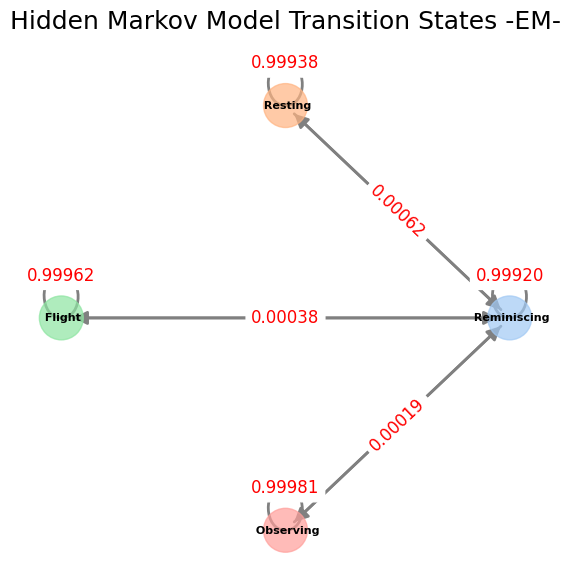

In [8]:
G = nx.DiGraph()
transition_matrix = em_model.transmat_
num_states = transition_matrix.shape[0]
dic_state = {
    1 : 'Resting',
    3 : 'Observing',
    2 : 'Flight',
    0 : 'Reminiscing'
}
for i in range(num_states):
    for j in range(num_states):
        prob = transition_matrix[i, j]
        if prob > 0:
            G.add_edge(f' {dic_state[i]}', f' {dic_state[j]}', weight=prob)



colors = sns.color_palette("pastel", num_states)


pos = nx.circular_layout(G)
edge_labels = {(n1, n2): f"{d['weight']:.5f}" for n1, n2, d in G.edges(data=True)}

plt.figure(figsize=(7, 7))
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=colors, node_shape="o", alpha=0.7)
nx.draw_networkx_edges(G, pos, width=2, edge_color="gray", arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)

plt.title('Hidden Markov Model Transition States -EM-', fontsize=18)
plt.axis('off')
plt.show()

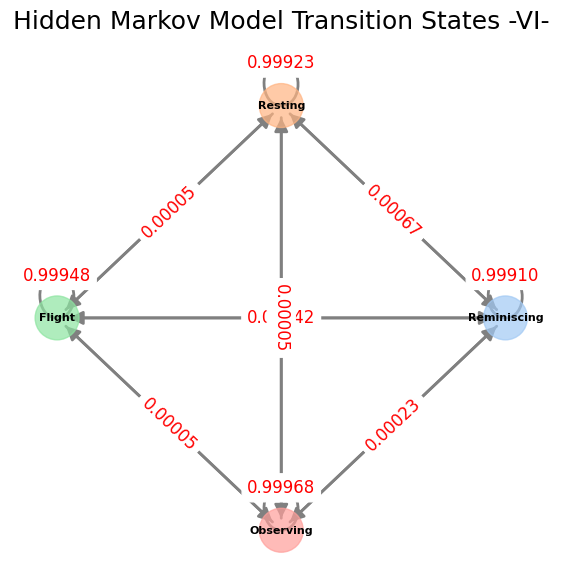

In [9]:

G = nx.DiGraph()
transition_matrix = vi_model.transmat_
num_states = transition_matrix.shape[0]
for i in range(num_states):
    for j in range(num_states):
        prob = transition_matrix[i, j]
        if prob > 0:
            G.add_edge(dic_state[i], dic_state[j], weight=prob)

colors = sns.color_palette("pastel", num_states)

pos = nx.circular_layout(G)
edge_labels = {(n1, n2): f"{d['weight']:.5f}" for n1, n2, d in G.edges(data=True)}

plt.figure(figsize=(7, 7))
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=colors, node_shape="o", alpha=0.7)
nx.draw_networkx_edges(G, pos, width=2, edge_color="gray", arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)

plt.title('Hidden Markov Model Transition States -VI-', fontsize=18)
plt.axis('off')
plt.show()